# Face Generation

In this project, you'll define and train a DCGAN on a dataset of faces. Your goal is to get a generator network to generate *new* images of faces that look as realistic as possible!

The project will be broken down into a series of tasks from **loading in data to defining and training adversarial networks**. At the end of the notebook, you'll be able to visualize the results of your trained Generator to see how it performs; your generated samples should look like fairly realistic faces with small amounts of noise.

### Get the Data

You'll be using the [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) to train your adversarial networks.

This dataset is more complex than the number datasets (like MNIST or SVHN) you've been working with, and so, you should prepare to define deeper networks and train them for a longer time to get good results. It is suggested that you utilize a GPU for training.

### Pre-processed Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. Some sample data is show below.

<img src='assets/processed_face_data.png' width=60% />

> If you are working locally, you can download this data [by clicking here](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be7eb6f_processed-celeba-small/processed-celeba-small.zip)

This is a zip file that you'll need to extract in the home directory of this notebook for further loading and processing. After extracting the data, you should be left with a directory of data `processed_celeba_small/`

In [2]:
# can comment out after executing
# !unzip processed-celeba-small.zip

Archive:  processed-celeba-small.zip
   creating: processed_celeba_small/
  inflating: processed_celeba_small/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/processed_celeba_small/
  inflating: __MACOSX/processed_celeba_small/._.DS_Store  
   creating: processed_celeba_small/celeba/
  inflating: processed_celeba_small/celeba/.DS_Store  
   creating: __MACOSX/processed_celeba_small/celeba/
  inflating: __MACOSX/processed_celeba_small/celeba/._.DS_Store  
  inflating: processed_celeba_small/celeba/161979.jpg  
  inflating: processed_celeba_small/celeba/161980.jpg  
  inflating: processed_celeba_small/celeba/161981.jpg  
  inflating: processed_celeba_small/celeba/161982.jpg  
  inflating: processed_celeba_small/celeba/161983.jpg  
  inflating: processed_celeba_small/celeba/161984.jpg  
  inflating: processed_celeba_small/celeba/161985.jpg  
  inflating: processed_celeba_small/celeba/161986.jpg  
  inflating: processed_celeba_small/celeba/161987.jpg  
  inflating: processed_celeb

  inflating: processed_celeba_small/celeba/163443.jpg  
  inflating: processed_celeba_small/celeba/163444.jpg  
  inflating: processed_celeba_small/celeba/163445.jpg  
  inflating: processed_celeba_small/celeba/163446.jpg  
  inflating: processed_celeba_small/celeba/163447.jpg  
  inflating: processed_celeba_small/celeba/163448.jpg  
  inflating: processed_celeba_small/celeba/163449.jpg  
  inflating: processed_celeba_small/celeba/163450.jpg  
  inflating: processed_celeba_small/celeba/163451.jpg  
  inflating: processed_celeba_small/celeba/163452.jpg  
  inflating: processed_celeba_small/celeba/163453.jpg  
  inflating: processed_celeba_small/celeba/163454.jpg  
  inflating: processed_celeba_small/celeba/163455.jpg  
  inflating: processed_celeba_small/celeba/163456.jpg  
  inflating: processed_celeba_small/celeba/163457.jpg  
  inflating: processed_celeba_small/celeba/163458.jpg  
  inflating: processed_celeba_small/celeba/163459.jpg  
  inflating: processed_celeba_small/celeba/16346

  inflating: processed_celeba_small/celeba/164443.jpg  
  inflating: processed_celeba_small/celeba/164444.jpg  
  inflating: processed_celeba_small/celeba/164445.jpg  
  inflating: processed_celeba_small/celeba/164446.jpg  
  inflating: processed_celeba_small/celeba/164447.jpg  
  inflating: processed_celeba_small/celeba/164448.jpg  
  inflating: processed_celeba_small/celeba/164449.jpg  
  inflating: processed_celeba_small/celeba/164450.jpg  
  inflating: processed_celeba_small/celeba/164451.jpg  
  inflating: processed_celeba_small/celeba/164452.jpg  
  inflating: processed_celeba_small/celeba/164453.jpg  
  inflating: processed_celeba_small/celeba/164454.jpg  
  inflating: processed_celeba_small/celeba/164455.jpg  
  inflating: processed_celeba_small/celeba/164456.jpg  
  inflating: processed_celeba_small/celeba/164457.jpg  
  inflating: processed_celeba_small/celeba/164458.jpg  
  inflating: processed_celeba_small/celeba/164459.jpg  
  inflating: processed_celeba_small/celeba/16446

  inflating: processed_celeba_small/celeba/165442.jpg  
  inflating: processed_celeba_small/celeba/165443.jpg  
  inflating: processed_celeba_small/celeba/165444.jpg  
  inflating: processed_celeba_small/celeba/165445.jpg  
  inflating: processed_celeba_small/celeba/165446.jpg  
  inflating: processed_celeba_small/celeba/165447.jpg  
  inflating: processed_celeba_small/celeba/165448.jpg  
  inflating: processed_celeba_small/celeba/165449.jpg  
  inflating: processed_celeba_small/celeba/165450.jpg  
  inflating: processed_celeba_small/celeba/165451.jpg  
  inflating: processed_celeba_small/celeba/165452.jpg  
  inflating: processed_celeba_small/celeba/165453.jpg  
  inflating: processed_celeba_small/celeba/165454.jpg  
  inflating: processed_celeba_small/celeba/165455.jpg  
  inflating: processed_celeba_small/celeba/165456.jpg  
  inflating: processed_celeba_small/celeba/165457.jpg  
  inflating: processed_celeba_small/celeba/165458.jpg  
  inflating: processed_celeba_small/celeba/16545

  inflating: processed_celeba_small/celeba/166442.jpg  
  inflating: processed_celeba_small/celeba/166443.jpg  
  inflating: processed_celeba_small/celeba/166444.jpg  
  inflating: processed_celeba_small/celeba/166445.jpg  
  inflating: processed_celeba_small/celeba/166446.jpg  
  inflating: processed_celeba_small/celeba/166447.jpg  
  inflating: processed_celeba_small/celeba/166448.jpg  
  inflating: processed_celeba_small/celeba/166449.jpg  
  inflating: processed_celeba_small/celeba/166450.jpg  
  inflating: processed_celeba_small/celeba/166451.jpg  
  inflating: processed_celeba_small/celeba/166452.jpg  
  inflating: processed_celeba_small/celeba/166453.jpg  
  inflating: processed_celeba_small/celeba/166454.jpg  
  inflating: processed_celeba_small/celeba/166455.jpg  
  inflating: processed_celeba_small/celeba/166456.jpg  
  inflating: processed_celeba_small/celeba/166457.jpg  
  inflating: processed_celeba_small/celeba/166458.jpg  
  inflating: processed_celeba_small/celeba/16645

  inflating: processed_celeba_small/celeba/167441.jpg  
  inflating: processed_celeba_small/celeba/167442.jpg  
  inflating: processed_celeba_small/celeba/167443.jpg  
  inflating: processed_celeba_small/celeba/167444.jpg  
  inflating: processed_celeba_small/celeba/167445.jpg  
  inflating: processed_celeba_small/celeba/167446.jpg  
  inflating: processed_celeba_small/celeba/167447.jpg  
  inflating: processed_celeba_small/celeba/167448.jpg  
  inflating: processed_celeba_small/celeba/167449.jpg  
  inflating: processed_celeba_small/celeba/167450.jpg  
  inflating: processed_celeba_small/celeba/167451.jpg  
  inflating: processed_celeba_small/celeba/167452.jpg  
  inflating: processed_celeba_small/celeba/167453.jpg  
  inflating: processed_celeba_small/celeba/167454.jpg  
  inflating: processed_celeba_small/celeba/167455.jpg  
  inflating: processed_celeba_small/celeba/167456.jpg  
  inflating: processed_celeba_small/celeba/167457.jpg  
  inflating: processed_celeba_small/celeba/16745

  inflating: processed_celeba_small/celeba/168441.jpg  
  inflating: processed_celeba_small/celeba/168442.jpg  
  inflating: processed_celeba_small/celeba/168443.jpg  
  inflating: processed_celeba_small/celeba/168444.jpg  
  inflating: processed_celeba_small/celeba/168445.jpg  
  inflating: processed_celeba_small/celeba/168446.jpg  
  inflating: processed_celeba_small/celeba/168447.jpg  
  inflating: processed_celeba_small/celeba/168448.jpg  
  inflating: processed_celeba_small/celeba/168449.jpg  
  inflating: processed_celeba_small/celeba/168450.jpg  
  inflating: processed_celeba_small/celeba/168451.jpg  
  inflating: processed_celeba_small/celeba/168452.jpg  
  inflating: processed_celeba_small/celeba/168453.jpg  
  inflating: processed_celeba_small/celeba/168454.jpg  
  inflating: processed_celeba_small/celeba/168455.jpg  
  inflating: processed_celeba_small/celeba/168456.jpg  
  inflating: processed_celeba_small/celeba/168457.jpg  
  inflating: processed_celeba_small/celeba/16845

  inflating: processed_celeba_small/celeba/169440.jpg  
  inflating: processed_celeba_small/celeba/169441.jpg  
  inflating: processed_celeba_small/celeba/169442.jpg  
  inflating: processed_celeba_small/celeba/169443.jpg  
  inflating: processed_celeba_small/celeba/169444.jpg  
  inflating: processed_celeba_small/celeba/169445.jpg  
  inflating: processed_celeba_small/celeba/169446.jpg  
  inflating: processed_celeba_small/celeba/169447.jpg  
  inflating: processed_celeba_small/celeba/169448.jpg  
  inflating: processed_celeba_small/celeba/169449.jpg  
  inflating: processed_celeba_small/celeba/169450.jpg  
  inflating: processed_celeba_small/celeba/169451.jpg  
  inflating: processed_celeba_small/celeba/169452.jpg  
  inflating: processed_celeba_small/celeba/169453.jpg  
  inflating: processed_celeba_small/celeba/169454.jpg  
  inflating: processed_celeba_small/celeba/169455.jpg  
  inflating: processed_celeba_small/celeba/169456.jpg  
  inflating: processed_celeba_small/celeba/16945

  inflating: processed_celeba_small/celeba/170440.jpg  
  inflating: processed_celeba_small/celeba/170441.jpg  
  inflating: processed_celeba_small/celeba/170442.jpg  
  inflating: processed_celeba_small/celeba/170443.jpg  
  inflating: processed_celeba_small/celeba/170444.jpg  
  inflating: processed_celeba_small/celeba/170445.jpg  
  inflating: processed_celeba_small/celeba/170446.jpg  
  inflating: processed_celeba_small/celeba/170447.jpg  
  inflating: processed_celeba_small/celeba/170448.jpg  
  inflating: processed_celeba_small/celeba/170449.jpg  
  inflating: processed_celeba_small/celeba/170450.jpg  
  inflating: processed_celeba_small/celeba/170451.jpg  
  inflating: processed_celeba_small/celeba/170452.jpg  
  inflating: processed_celeba_small/celeba/170453.jpg  
  inflating: processed_celeba_small/celeba/170454.jpg  
  inflating: processed_celeba_small/celeba/170455.jpg  
  inflating: processed_celeba_small/celeba/170456.jpg  
  inflating: processed_celeba_small/celeba/17045

  inflating: processed_celeba_small/celeba/171439.jpg  
  inflating: processed_celeba_small/celeba/171440.jpg  
  inflating: processed_celeba_small/celeba/171441.jpg  
  inflating: processed_celeba_small/celeba/171442.jpg  
  inflating: processed_celeba_small/celeba/171443.jpg  
  inflating: processed_celeba_small/celeba/171444.jpg  
  inflating: processed_celeba_small/celeba/171445.jpg  
  inflating: processed_celeba_small/celeba/171446.jpg  
  inflating: processed_celeba_small/celeba/171447.jpg  
  inflating: processed_celeba_small/celeba/171448.jpg  
  inflating: processed_celeba_small/celeba/171449.jpg  
  inflating: processed_celeba_small/celeba/171450.jpg  
  inflating: processed_celeba_small/celeba/171451.jpg  
  inflating: processed_celeba_small/celeba/171452.jpg  
  inflating: processed_celeba_small/celeba/171453.jpg  
  inflating: processed_celeba_small/celeba/171454.jpg  
  inflating: processed_celeba_small/celeba/171455.jpg  
  inflating: processed_celeba_small/celeba/17145

  inflating: processed_celeba_small/celeba/172439.jpg  
  inflating: processed_celeba_small/celeba/172440.jpg  
  inflating: processed_celeba_small/celeba/172441.jpg  
  inflating: processed_celeba_small/celeba/172442.jpg  
  inflating: processed_celeba_small/celeba/172443.jpg  
  inflating: processed_celeba_small/celeba/172444.jpg  
  inflating: processed_celeba_small/celeba/172445.jpg  
  inflating: processed_celeba_small/celeba/172446.jpg  
  inflating: processed_celeba_small/celeba/172447.jpg  
  inflating: processed_celeba_small/celeba/172448.jpg  
  inflating: processed_celeba_small/celeba/172449.jpg  
  inflating: processed_celeba_small/celeba/172450.jpg  
  inflating: processed_celeba_small/celeba/172451.jpg  
  inflating: processed_celeba_small/celeba/172452.jpg  
  inflating: processed_celeba_small/celeba/172453.jpg  
  inflating: processed_celeba_small/celeba/172454.jpg  
  inflating: processed_celeba_small/celeba/172455.jpg  
  inflating: processed_celeba_small/celeba/17245

  inflating: processed_celeba_small/celeba/173438.jpg  
  inflating: processed_celeba_small/celeba/173439.jpg  
  inflating: processed_celeba_small/celeba/173440.jpg  
  inflating: processed_celeba_small/celeba/173441.jpg  
  inflating: processed_celeba_small/celeba/173442.jpg  
  inflating: processed_celeba_small/celeba/173443.jpg  
  inflating: processed_celeba_small/celeba/173444.jpg  
  inflating: processed_celeba_small/celeba/173445.jpg  
  inflating: processed_celeba_small/celeba/173446.jpg  
  inflating: processed_celeba_small/celeba/173447.jpg  
  inflating: processed_celeba_small/celeba/173448.jpg  
  inflating: processed_celeba_small/celeba/173449.jpg  
  inflating: processed_celeba_small/celeba/173450.jpg  
  inflating: processed_celeba_small/celeba/173451.jpg  
  inflating: processed_celeba_small/celeba/173452.jpg  
  inflating: processed_celeba_small/celeba/173453.jpg  
  inflating: processed_celeba_small/celeba/173454.jpg  
  inflating: processed_celeba_small/celeba/17345

  inflating: processed_celeba_small/celeba/174438.jpg  
  inflating: processed_celeba_small/celeba/174439.jpg  
  inflating: processed_celeba_small/celeba/174440.jpg  
  inflating: processed_celeba_small/celeba/174441.jpg  
  inflating: processed_celeba_small/celeba/174442.jpg  
  inflating: processed_celeba_small/celeba/174443.jpg  
  inflating: processed_celeba_small/celeba/174444.jpg  
  inflating: processed_celeba_small/celeba/174445.jpg  
  inflating: processed_celeba_small/celeba/174446.jpg  
  inflating: processed_celeba_small/celeba/174447.jpg  
  inflating: processed_celeba_small/celeba/174448.jpg  
  inflating: processed_celeba_small/celeba/174449.jpg  
  inflating: processed_celeba_small/celeba/174450.jpg  
  inflating: processed_celeba_small/celeba/174451.jpg  
  inflating: processed_celeba_small/celeba/174452.jpg  
  inflating: processed_celeba_small/celeba/174453.jpg  
  inflating: processed_celeba_small/celeba/174454.jpg  
  inflating: processed_celeba_small/celeba/17445

  inflating: processed_celeba_small/celeba/175437.jpg  
  inflating: processed_celeba_small/celeba/175438.jpg  
  inflating: processed_celeba_small/celeba/175439.jpg  
  inflating: processed_celeba_small/celeba/175440.jpg  
  inflating: processed_celeba_small/celeba/175441.jpg  
  inflating: processed_celeba_small/celeba/175442.jpg  
  inflating: processed_celeba_small/celeba/175443.jpg  
  inflating: processed_celeba_small/celeba/175444.jpg  
  inflating: processed_celeba_small/celeba/175445.jpg  
  inflating: processed_celeba_small/celeba/175446.jpg  
  inflating: processed_celeba_small/celeba/175447.jpg  
  inflating: processed_celeba_small/celeba/175448.jpg  
  inflating: processed_celeba_small/celeba/175449.jpg  
  inflating: processed_celeba_small/celeba/175450.jpg  
  inflating: processed_celeba_small/celeba/175451.jpg  
  inflating: processed_celeba_small/celeba/175452.jpg  
  inflating: processed_celeba_small/celeba/175453.jpg  
  inflating: processed_celeba_small/celeba/17545

  inflating: processed_celeba_small/celeba/176437.jpg  
  inflating: processed_celeba_small/celeba/176438.jpg  
  inflating: processed_celeba_small/celeba/176439.jpg  
  inflating: processed_celeba_small/celeba/176440.jpg  
  inflating: processed_celeba_small/celeba/176441.jpg  
  inflating: processed_celeba_small/celeba/176442.jpg  
  inflating: processed_celeba_small/celeba/176443.jpg  
  inflating: processed_celeba_small/celeba/176444.jpg  
  inflating: processed_celeba_small/celeba/176445.jpg  
  inflating: processed_celeba_small/celeba/176446.jpg  
  inflating: processed_celeba_small/celeba/176447.jpg  
  inflating: processed_celeba_small/celeba/176448.jpg  
  inflating: processed_celeba_small/celeba/176449.jpg  
  inflating: processed_celeba_small/celeba/176450.jpg  
  inflating: processed_celeba_small/celeba/176451.jpg  
  inflating: processed_celeba_small/celeba/176452.jpg  
  inflating: processed_celeba_small/celeba/176453.jpg  
  inflating: processed_celeba_small/celeba/17645

  inflating: processed_celeba_small/celeba/177436.jpg  
  inflating: processed_celeba_small/celeba/177437.jpg  
  inflating: processed_celeba_small/celeba/177438.jpg  
  inflating: processed_celeba_small/celeba/177439.jpg  
  inflating: processed_celeba_small/celeba/177440.jpg  
  inflating: processed_celeba_small/celeba/177441.jpg  
  inflating: processed_celeba_small/celeba/177442.jpg  
  inflating: processed_celeba_small/celeba/177443.jpg  
  inflating: processed_celeba_small/celeba/177444.jpg  
  inflating: processed_celeba_small/celeba/177445.jpg  
  inflating: processed_celeba_small/celeba/177446.jpg  
  inflating: processed_celeba_small/celeba/177447.jpg  
  inflating: processed_celeba_small/celeba/177448.jpg  
  inflating: processed_celeba_small/celeba/177449.jpg  
  inflating: processed_celeba_small/celeba/177450.jpg  
  inflating: processed_celeba_small/celeba/177451.jpg  
  inflating: processed_celeba_small/celeba/177452.jpg  
  inflating: processed_celeba_small/celeba/17745

  inflating: processed_celeba_small/celeba/178436.jpg  
  inflating: processed_celeba_small/celeba/178437.jpg  
  inflating: processed_celeba_small/celeba/178438.jpg  
  inflating: processed_celeba_small/celeba/178439.jpg  
  inflating: processed_celeba_small/celeba/178440.jpg  
  inflating: processed_celeba_small/celeba/178441.jpg  
  inflating: processed_celeba_small/celeba/178442.jpg  
  inflating: processed_celeba_small/celeba/178443.jpg  
  inflating: processed_celeba_small/celeba/178444.jpg  
  inflating: processed_celeba_small/celeba/178445.jpg  
  inflating: processed_celeba_small/celeba/178446.jpg  
  inflating: processed_celeba_small/celeba/178447.jpg  
  inflating: processed_celeba_small/celeba/178448.jpg  
  inflating: processed_celeba_small/celeba/178449.jpg  
  inflating: processed_celeba_small/celeba/178450.jpg  
  inflating: processed_celeba_small/celeba/178451.jpg  
  inflating: processed_celeba_small/celeba/178452.jpg  
  inflating: processed_celeba_small/celeba/17845

  inflating: processed_celeba_small/celeba/179435.jpg  
  inflating: processed_celeba_small/celeba/179436.jpg  
  inflating: processed_celeba_small/celeba/179437.jpg  
  inflating: processed_celeba_small/celeba/179438.jpg  
  inflating: processed_celeba_small/celeba/179439.jpg  
  inflating: processed_celeba_small/celeba/179440.jpg  
  inflating: processed_celeba_small/celeba/179441.jpg  
  inflating: processed_celeba_small/celeba/179442.jpg  
  inflating: processed_celeba_small/celeba/179443.jpg  
  inflating: processed_celeba_small/celeba/179444.jpg  
  inflating: processed_celeba_small/celeba/179445.jpg  
  inflating: processed_celeba_small/celeba/179446.jpg  
  inflating: processed_celeba_small/celeba/179447.jpg  
  inflating: processed_celeba_small/celeba/179448.jpg  
  inflating: processed_celeba_small/celeba/179449.jpg  
  inflating: processed_celeba_small/celeba/179450.jpg  
  inflating: processed_celeba_small/celeba/179451.jpg  
  inflating: processed_celeba_small/celeba/17945

  inflating: processed_celeba_small/celeba/180435.jpg  
  inflating: processed_celeba_small/celeba/180436.jpg  
  inflating: processed_celeba_small/celeba/180437.jpg  
  inflating: processed_celeba_small/celeba/180438.jpg  
  inflating: processed_celeba_small/celeba/180439.jpg  
  inflating: processed_celeba_small/celeba/180440.jpg  
  inflating: processed_celeba_small/celeba/180441.jpg  
  inflating: processed_celeba_small/celeba/180442.jpg  
  inflating: processed_celeba_small/celeba/180443.jpg  
  inflating: processed_celeba_small/celeba/180444.jpg  
  inflating: processed_celeba_small/celeba/180445.jpg  
  inflating: processed_celeba_small/celeba/180446.jpg  
  inflating: processed_celeba_small/celeba/180447.jpg  
  inflating: processed_celeba_small/celeba/180448.jpg  
  inflating: processed_celeba_small/celeba/180449.jpg  
  inflating: processed_celeba_small/celeba/180450.jpg  
  inflating: processed_celeba_small/celeba/180451.jpg  
  inflating: processed_celeba_small/celeba/18045

  inflating: processed_celeba_small/celeba/181434.jpg  
  inflating: processed_celeba_small/celeba/181435.jpg  
  inflating: processed_celeba_small/celeba/181436.jpg  
  inflating: processed_celeba_small/celeba/181437.jpg  
  inflating: processed_celeba_small/celeba/181438.jpg  
  inflating: processed_celeba_small/celeba/181439.jpg  
  inflating: processed_celeba_small/celeba/181440.jpg  
  inflating: processed_celeba_small/celeba/181441.jpg  
  inflating: processed_celeba_small/celeba/181442.jpg  
  inflating: processed_celeba_small/celeba/181443.jpg  
  inflating: processed_celeba_small/celeba/181444.jpg  
  inflating: processed_celeba_small/celeba/181445.jpg  
  inflating: processed_celeba_small/celeba/181446.jpg  
  inflating: processed_celeba_small/celeba/181447.jpg  
  inflating: processed_celeba_small/celeba/181448.jpg  
  inflating: processed_celeba_small/celeba/181449.jpg  
  inflating: processed_celeba_small/celeba/181450.jpg  
  inflating: processed_celeba_small/celeba/18145

  inflating: processed_celeba_small/celeba/182434.jpg  
  inflating: processed_celeba_small/celeba/182435.jpg  
  inflating: processed_celeba_small/celeba/182436.jpg  
  inflating: processed_celeba_small/celeba/182437.jpg  
  inflating: processed_celeba_small/celeba/182438.jpg  
  inflating: processed_celeba_small/celeba/182439.jpg  
  inflating: processed_celeba_small/celeba/182440.jpg  
  inflating: processed_celeba_small/celeba/182441.jpg  
  inflating: processed_celeba_small/celeba/182442.jpg  
  inflating: processed_celeba_small/celeba/182443.jpg  
  inflating: processed_celeba_small/celeba/182444.jpg  
  inflating: processed_celeba_small/celeba/182445.jpg  
  inflating: processed_celeba_small/celeba/182446.jpg  
  inflating: processed_celeba_small/celeba/182447.jpg  
  inflating: processed_celeba_small/celeba/182448.jpg  
  inflating: processed_celeba_small/celeba/182449.jpg  
  inflating: processed_celeba_small/celeba/182450.jpg  
  inflating: processed_celeba_small/celeba/18245

  inflating: processed_celeba_small/celeba/183433.jpg  
  inflating: processed_celeba_small/celeba/183434.jpg  
  inflating: processed_celeba_small/celeba/183435.jpg  
  inflating: processed_celeba_small/celeba/183436.jpg  
  inflating: processed_celeba_small/celeba/183437.jpg  
  inflating: processed_celeba_small/celeba/183438.jpg  
  inflating: processed_celeba_small/celeba/183439.jpg  
  inflating: processed_celeba_small/celeba/183440.jpg  
  inflating: processed_celeba_small/celeba/183441.jpg  
  inflating: processed_celeba_small/celeba/183442.jpg  
  inflating: processed_celeba_small/celeba/183443.jpg  
  inflating: processed_celeba_small/celeba/183444.jpg  
  inflating: processed_celeba_small/celeba/183445.jpg  
  inflating: processed_celeba_small/celeba/183446.jpg  
  inflating: processed_celeba_small/celeba/183447.jpg  
  inflating: processed_celeba_small/celeba/183448.jpg  
  inflating: processed_celeba_small/celeba/183449.jpg  
  inflating: processed_celeba_small/celeba/18345

  inflating: processed_celeba_small/celeba/184433.jpg  
  inflating: processed_celeba_small/celeba/184434.jpg  
  inflating: processed_celeba_small/celeba/184435.jpg  
  inflating: processed_celeba_small/celeba/184436.jpg  
  inflating: processed_celeba_small/celeba/184437.jpg  
  inflating: processed_celeba_small/celeba/184438.jpg  
  inflating: processed_celeba_small/celeba/184439.jpg  
  inflating: processed_celeba_small/celeba/184440.jpg  
  inflating: processed_celeba_small/celeba/184441.jpg  
  inflating: processed_celeba_small/celeba/184442.jpg  
  inflating: processed_celeba_small/celeba/184443.jpg  
  inflating: processed_celeba_small/celeba/184444.jpg  
  inflating: processed_celeba_small/celeba/184445.jpg  
  inflating: processed_celeba_small/celeba/184446.jpg  
  inflating: processed_celeba_small/celeba/184447.jpg  
  inflating: processed_celeba_small/celeba/184448.jpg  
  inflating: processed_celeba_small/celeba/184449.jpg  
  inflating: processed_celeba_small/celeba/18445

  inflating: processed_celeba_small/celeba/185432.jpg  
  inflating: processed_celeba_small/celeba/185433.jpg  
  inflating: processed_celeba_small/celeba/185434.jpg  
  inflating: processed_celeba_small/celeba/185435.jpg  
  inflating: processed_celeba_small/celeba/185436.jpg  
  inflating: processed_celeba_small/celeba/185437.jpg  
  inflating: processed_celeba_small/celeba/185438.jpg  
  inflating: processed_celeba_small/celeba/185439.jpg  
  inflating: processed_celeba_small/celeba/185440.jpg  
  inflating: processed_celeba_small/celeba/185441.jpg  
  inflating: processed_celeba_small/celeba/185442.jpg  
  inflating: processed_celeba_small/celeba/185443.jpg  
  inflating: processed_celeba_small/celeba/185444.jpg  
  inflating: processed_celeba_small/celeba/185445.jpg  
  inflating: processed_celeba_small/celeba/185446.jpg  
  inflating: processed_celeba_small/celeba/185447.jpg  
  inflating: processed_celeba_small/celeba/185448.jpg  
  inflating: processed_celeba_small/celeba/18544

  inflating: processed_celeba_small/celeba/186432.jpg  
  inflating: processed_celeba_small/celeba/186433.jpg  
  inflating: processed_celeba_small/celeba/186434.jpg  
  inflating: processed_celeba_small/celeba/186435.jpg  
  inflating: processed_celeba_small/celeba/186436.jpg  
  inflating: processed_celeba_small/celeba/186437.jpg  
  inflating: processed_celeba_small/celeba/186438.jpg  
  inflating: processed_celeba_small/celeba/186439.jpg  
  inflating: processed_celeba_small/celeba/186440.jpg  
  inflating: processed_celeba_small/celeba/186441.jpg  
  inflating: processed_celeba_small/celeba/186442.jpg  
  inflating: processed_celeba_small/celeba/186443.jpg  
  inflating: processed_celeba_small/celeba/186444.jpg  
  inflating: processed_celeba_small/celeba/186445.jpg  
  inflating: processed_celeba_small/celeba/186446.jpg  
  inflating: processed_celeba_small/celeba/186447.jpg  
  inflating: processed_celeba_small/celeba/186448.jpg  
  inflating: processed_celeba_small/celeba/18644

  inflating: processed_celeba_small/celeba/187431.jpg  
  inflating: processed_celeba_small/celeba/187432.jpg  
  inflating: processed_celeba_small/celeba/187433.jpg  
  inflating: processed_celeba_small/celeba/187434.jpg  
  inflating: processed_celeba_small/celeba/187435.jpg  
  inflating: processed_celeba_small/celeba/187436.jpg  
  inflating: processed_celeba_small/celeba/187437.jpg  
  inflating: processed_celeba_small/celeba/187438.jpg  
  inflating: processed_celeba_small/celeba/187439.jpg  
  inflating: processed_celeba_small/celeba/187440.jpg  
  inflating: processed_celeba_small/celeba/187441.jpg  
  inflating: processed_celeba_small/celeba/187442.jpg  
  inflating: processed_celeba_small/celeba/187443.jpg  
  inflating: processed_celeba_small/celeba/187444.jpg  
  inflating: processed_celeba_small/celeba/187445.jpg  
  inflating: processed_celeba_small/celeba/187446.jpg  
  inflating: processed_celeba_small/celeba/187447.jpg  
  inflating: processed_celeba_small/celeba/18744

  inflating: processed_celeba_small/celeba/188431.jpg  
  inflating: processed_celeba_small/celeba/188432.jpg  
  inflating: processed_celeba_small/celeba/188433.jpg  
  inflating: processed_celeba_small/celeba/188434.jpg  
  inflating: processed_celeba_small/celeba/188435.jpg  
  inflating: processed_celeba_small/celeba/188436.jpg  
  inflating: processed_celeba_small/celeba/188437.jpg  
  inflating: processed_celeba_small/celeba/188438.jpg  
  inflating: processed_celeba_small/celeba/188439.jpg  
  inflating: processed_celeba_small/celeba/188440.jpg  
  inflating: processed_celeba_small/celeba/188441.jpg  
  inflating: processed_celeba_small/celeba/188442.jpg  
  inflating: processed_celeba_small/celeba/188443.jpg  
  inflating: processed_celeba_small/celeba/188444.jpg  
  inflating: processed_celeba_small/celeba/188445.jpg  
  inflating: processed_celeba_small/celeba/188446.jpg  
  inflating: processed_celeba_small/celeba/188447.jpg  
  inflating: processed_celeba_small/celeba/18844

  inflating: processed_celeba_small/celeba/189430.jpg  
  inflating: processed_celeba_small/celeba/189431.jpg  
  inflating: processed_celeba_small/celeba/189432.jpg  
  inflating: processed_celeba_small/celeba/189433.jpg  
  inflating: processed_celeba_small/celeba/189434.jpg  
  inflating: processed_celeba_small/celeba/189435.jpg  
  inflating: processed_celeba_small/celeba/189436.jpg  
  inflating: processed_celeba_small/celeba/189437.jpg  
  inflating: processed_celeba_small/celeba/189438.jpg  
  inflating: processed_celeba_small/celeba/189439.jpg  
  inflating: processed_celeba_small/celeba/189440.jpg  
  inflating: processed_celeba_small/celeba/189441.jpg  
  inflating: processed_celeba_small/celeba/189442.jpg  
  inflating: processed_celeba_small/celeba/189443.jpg  
  inflating: processed_celeba_small/celeba/189444.jpg  
  inflating: processed_celeba_small/celeba/189445.jpg  
  inflating: processed_celeba_small/celeba/189446.jpg  
  inflating: processed_celeba_small/celeba/18944

  inflating: processed_celeba_small/celeba/190430.jpg  
  inflating: processed_celeba_small/celeba/190431.jpg  
  inflating: processed_celeba_small/celeba/190432.jpg  
  inflating: processed_celeba_small/celeba/190433.jpg  
  inflating: processed_celeba_small/celeba/190434.jpg  
  inflating: processed_celeba_small/celeba/190435.jpg  
  inflating: processed_celeba_small/celeba/190436.jpg  
  inflating: processed_celeba_small/celeba/190437.jpg  
  inflating: processed_celeba_small/celeba/190438.jpg  
  inflating: processed_celeba_small/celeba/190439.jpg  
  inflating: processed_celeba_small/celeba/190440.jpg  
  inflating: processed_celeba_small/celeba/190441.jpg  
  inflating: processed_celeba_small/celeba/190442.jpg  
  inflating: processed_celeba_small/celeba/190443.jpg  
  inflating: processed_celeba_small/celeba/190444.jpg  
  inflating: processed_celeba_small/celeba/190445.jpg  
  inflating: processed_celeba_small/celeba/190446.jpg  
  inflating: processed_celeba_small/celeba/19044

  inflating: processed_celeba_small/celeba/191429.jpg  
  inflating: processed_celeba_small/celeba/191430.jpg  
  inflating: processed_celeba_small/celeba/191431.jpg  
  inflating: processed_celeba_small/celeba/191432.jpg  
  inflating: processed_celeba_small/celeba/191433.jpg  
  inflating: processed_celeba_small/celeba/191434.jpg  
  inflating: processed_celeba_small/celeba/191435.jpg  
  inflating: processed_celeba_small/celeba/191436.jpg  
  inflating: processed_celeba_small/celeba/191437.jpg  
  inflating: processed_celeba_small/celeba/191438.jpg  
  inflating: processed_celeba_small/celeba/191439.jpg  
  inflating: processed_celeba_small/celeba/191440.jpg  
  inflating: processed_celeba_small/celeba/191441.jpg  
  inflating: processed_celeba_small/celeba/191442.jpg  
  inflating: processed_celeba_small/celeba/191443.jpg  
  inflating: processed_celeba_small/celeba/191444.jpg  
  inflating: processed_celeba_small/celeba/191445.jpg  
  inflating: processed_celeba_small/celeba/19144

  inflating: processed_celeba_small/celeba/192429.jpg  
  inflating: processed_celeba_small/celeba/192430.jpg  
  inflating: processed_celeba_small/celeba/192431.jpg  
  inflating: processed_celeba_small/celeba/192432.jpg  
  inflating: processed_celeba_small/celeba/192433.jpg  
  inflating: processed_celeba_small/celeba/192434.jpg  
  inflating: processed_celeba_small/celeba/192435.jpg  
  inflating: processed_celeba_small/celeba/192436.jpg  
  inflating: processed_celeba_small/celeba/192437.jpg  
  inflating: processed_celeba_small/celeba/192438.jpg  
  inflating: processed_celeba_small/celeba/192439.jpg  
  inflating: processed_celeba_small/celeba/192440.jpg  
  inflating: processed_celeba_small/celeba/192441.jpg  
  inflating: processed_celeba_small/celeba/192442.jpg  
  inflating: processed_celeba_small/celeba/192443.jpg  
  inflating: processed_celeba_small/celeba/192444.jpg  
  inflating: processed_celeba_small/celeba/192445.jpg  
  inflating: processed_celeba_small/celeba/19244

  inflating: processed_celeba_small/celeba/193428.jpg  
  inflating: processed_celeba_small/celeba/193429.jpg  
  inflating: processed_celeba_small/celeba/193430.jpg  
  inflating: processed_celeba_small/celeba/193431.jpg  
  inflating: processed_celeba_small/celeba/193432.jpg  
  inflating: processed_celeba_small/celeba/193433.jpg  
  inflating: processed_celeba_small/celeba/193434.jpg  
  inflating: processed_celeba_small/celeba/193435.jpg  
  inflating: processed_celeba_small/celeba/193436.jpg  
  inflating: processed_celeba_small/celeba/193437.jpg  
  inflating: processed_celeba_small/celeba/193438.jpg  
  inflating: processed_celeba_small/celeba/193439.jpg  
  inflating: processed_celeba_small/celeba/193440.jpg  
  inflating: processed_celeba_small/celeba/193441.jpg  
  inflating: processed_celeba_small/celeba/193442.jpg  
  inflating: processed_celeba_small/celeba/193443.jpg  
  inflating: processed_celeba_small/celeba/193444.jpg  
  inflating: processed_celeba_small/celeba/19344

  inflating: processed_celeba_small/celeba/194428.jpg  
  inflating: processed_celeba_small/celeba/194429.jpg  
  inflating: processed_celeba_small/celeba/194430.jpg  
  inflating: processed_celeba_small/celeba/194431.jpg  
  inflating: processed_celeba_small/celeba/194432.jpg  
  inflating: processed_celeba_small/celeba/194433.jpg  
  inflating: processed_celeba_small/celeba/194434.jpg  
  inflating: processed_celeba_small/celeba/194435.jpg  
  inflating: processed_celeba_small/celeba/194436.jpg  
  inflating: processed_celeba_small/celeba/194437.jpg  
  inflating: processed_celeba_small/celeba/194438.jpg  
  inflating: processed_celeba_small/celeba/194439.jpg  
  inflating: processed_celeba_small/celeba/194440.jpg  
  inflating: processed_celeba_small/celeba/194441.jpg  
  inflating: processed_celeba_small/celeba/194442.jpg  
  inflating: processed_celeba_small/celeba/194443.jpg  
  inflating: processed_celeba_small/celeba/194444.jpg  
  inflating: processed_celeba_small/celeba/19444

  inflating: processed_celeba_small/celeba/New Folder With Items/000848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/000859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/001848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/001859.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/002847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/002858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/003847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003854.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003855.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003856.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003857.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/003858.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/005346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/005357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/006346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/006357.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/007345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/007356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/008345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/008356.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/009344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/009355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/010344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/010355.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/011343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/011354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/012343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/012354.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/013342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/013353.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/014842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014849.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014850.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014851.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014852.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/014853.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/016341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/016352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/017341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/017352.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/018340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/018351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/019340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/019351.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/020339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/020350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/021339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/021350.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/022338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/022349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/023338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023347.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023348.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/023349.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/024837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/024848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/025837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/025848.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/026836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/026847.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/028265.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028266.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028267.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028268.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028269.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028270.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028271.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028272.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028273.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028274.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028275.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/028276.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/029335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029341.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029342.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029343.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029344.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029345.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/029346.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/030835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/030846.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/031921.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031922.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031923.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031924.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031925.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031926.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031927.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031928.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031929.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031930.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031931.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/031932.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/032834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/032845.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/033833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/033844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/034833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/034844.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/035832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/035843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/036832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/036843.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/037831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/037842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/038831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/038842.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/039830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/039841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/040830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/040841.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/041829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041838.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041839.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/041840.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/043329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/043340.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/044328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/044339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/045328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/045339.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/046327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/046338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/047327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/047338.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/048326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048336.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/048337.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/049826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/049837.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/050825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/050836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/051825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/051836.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/053324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/053335.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/054824.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054825.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054826.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054827.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054828.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054829.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054830.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054831.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054832.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054833.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054834.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/054835.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

  inflating: processed_celeba_small/celeba/New Folder With Items/056323.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056324.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056325.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056326.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056327.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056328.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056329.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056330.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056331.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056332.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056333.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items/056334.jpg  
  inflating: processed_celeba_small/celeba/New Folder With Items

In [1]:
data_dir = 'processed_celeba_small/'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np
import problem_unittests as tests
#import helper

%matplotlib inline

## Visualize the CelebA Data

The [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations. Since you're going to be generating faces, you won't need the annotations, you'll only need the images. Note that these are color images with [3 color channels (RGB)](https://en.wikipedia.org/wiki/Channel_(digital_image)#RGB_Images) each.

### Pre-process and Load the Data

Since the project's main focus is on building the GANs, we've done *some* of the pre-processing for you. Each of the CelebA images has been cropped to remove parts of the image that don't include a face, then resized down to 64x64x3 NumPy images. This *pre-processed* dataset is a smaller subset of the very large CelebA data.

> There are a few other steps that you'll need to **transform** this data and create a **DataLoader**.

#### Exercise: Complete the following `get_dataloader` function, such that it satisfies these requirements:

* Your images should be square, Tensor images of size `image_size x image_size` in the x and y dimension.
* Your function should return a DataLoader that shuffles and batches these Tensor images.

#### ImageFolder

To create a dataset given a directory of images, it's recommended that you use PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) wrapper, with a root directory `processed_celeba_small/` and data transformation passed in.

In [2]:
# necessary imports
import torch
from torchvision import datasets
from torchvision import transforms

In [3]:
def get_dataloader(batch_size, image_size, data_dir='processed_celeba_small/'):
    """
    Batch the neural network data using DataLoader
    :param batch_size: The size of each batch; the number of images in a batch
    :param img_size: The square size of the image data (x, y)
    :param data_dir: Directory where image data is located
    :return: DataLoader with batched data
    """
    
    # TODO: Implement function and return a dataloader
    
    data_transforms = transforms.Compose([transforms.Resize((image_size, image_size)),
                                     transforms.ToTensor()])
    
    data = datasets.ImageFolder(data_dir, transform=data_transforms)

    dataloader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    
    return dataloader


## Create a DataLoader

#### Exercise: Create a DataLoader `celeba_train_loader` with appropriate hyperparameters.

Call the above function and create a dataloader to view images. 
* You can decide on any reasonable `batch_size` parameter
* Your `image_size` **must be** `32`. Resizing the data to a smaller size will make for faster training, while still creating convincing images of faces!

In [4]:
# Define function hyperparameters
batch_size = 32
img_size = 32

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# Call your function and get a dataloader
celeba_train_loader = get_dataloader(batch_size, img_size)


Next, you can view some images! You should seen square images of somewhat-centered faces.

Note: You'll need to convert the Tensor images into a NumPy type and transpose the dimensions to correctly display an image, suggested `imshow` code is below, but it may not be perfect.

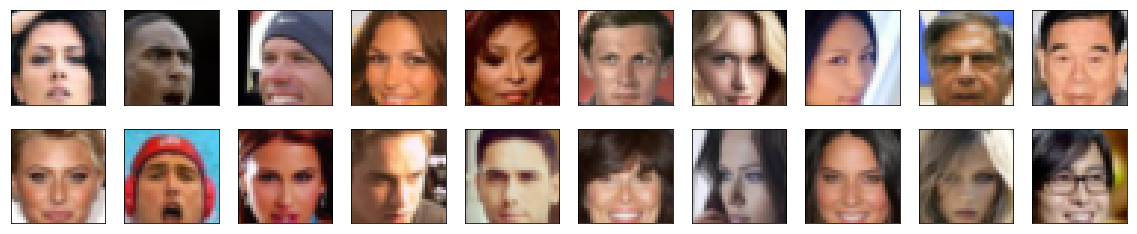

In [5]:
# helper display function
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# obtain one batch of training images
dataiter = iter(celeba_train_loader)
images, _ = dataiter.next() # _ for no labels

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
plot_size=20
for idx in np.arange(plot_size):
    ax = fig.add_subplot(2, plot_size/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

#### Exercise: Pre-process your image data and scale it to a pixel range of -1 to 1

You need to do a bit of pre-processing; you know that the output of a `tanh` activated generator will contain pixel values in a range from -1 to 1, and so, we need to rescale our training images to a range of -1 to 1. (Right now, they are in a range from 0-1.)

In [6]:
# TODO: Complete the scale function
def scale(x, feature_range=(-1, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    # assume x is scaled to (0, 1)
    # scale to feature_range and return scaled x
    
    x = (feature_range[1] - feature_range[0]) * x + feature_range[0]
    
    return x


In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
# check scaled range
# should be close to -1 to 1
img = images[0]
scaled_img = scale(img)

print('Min: ', scaled_img.min())
print('Max: ', scaled_img.max())

Min:  tensor(-0.9608)
Max:  tensor(0.9922)


---
# Define the Model

A GAN is comprised of two adversarial networks, a discriminator and a generator.

## Discriminator

Your first task will be to define the discriminator. This is a convolutional classifier like you've built before, only without any maxpooling layers. To deal with this complex data, it's suggested you use a deep network with **normalization**. You are also allowed to create any helper functions that may be useful.

#### Exercise: Complete the Discriminator class
* The inputs to the discriminator are 32x32x3 tensor images
* The output should be a single value that will indicate whether a given image is real or fake


In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
def conv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)


class Discriminator(nn.Module):

    def __init__(self, conv_dim):
        """
        Initialize the Discriminator Module
        :param conv_dim: The depth of the first convolutional layer
        """
        super(Discriminator, self).__init__()

        # complete init function
        
        self.conv_dim = conv_dim
        
        self.conv_layer_1 = conv(3, conv_dim, 4, batch_norm=False)
        self.conv_layer_2 = conv(conv_dim, conv_dim*2, 4)
        self.conv_layer_3 = conv(conv_dim*2, conv_dim*4, 4)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.fc = nn.Linear(conv_dim*4*4*4, 1)
        

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: Discriminator logits; the output of the neural network
        """
        # define feedforward behavior
        
        x = self.conv_layer_1(x)
        x = self.leaky_relu(x)
        x = self.conv_layer_2(x)
        x = self.leaky_relu(x)
        x = self.conv_layer_3(x)
        x = self.leaky_relu(x)
        
        x = x.view(-1, self.conv_dim*4*4*4)
        
        x = self.fc(x)
        
        return x


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(Discriminator)

Tests Passed


## Generator

The generator should upsample an input and generate a *new* image of the same size as our training data `32x32x3`. This should be mostly transpose convolutional layers with normalization applied to the outputs.

#### Exercise: Complete the Generator class
* The inputs to the generator are vectors of some length `z_size`
* The output should be a image of shape `32x32x3`

In [10]:
def deconv(in_channels, out_channels, kernel_size, stride=2, padding=1, batch_norm=True):
    """Creates a transposed-convolutional layer, with optional batch normalization.
    """
    ## TODO: Complete this function
    ## create a sequence of transpose + optional batch norm layers
        
    layers = []
    deconv_layer = nn.ConvTranspose2d(in_channels, out_channels, 
                                      kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(deconv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)


class Generator(nn.Module):
    
    def __init__(self, z_size, conv_dim):
        """
        Initialize the Generator Module
        :param z_size: The length of the input latent vector, z
        :param conv_dim: The depth of the inputs to the *last* transpose convolutional layer
        """
        super(Generator, self).__init__()

        # complete init function
        
        self.conv_dim = conv_dim
        
        self.fc = nn.Linear(z_size, conv_dim*4*4*4)
        
        self.deconv_1 = deconv(conv_dim*4, conv_dim*2, 4)
        self.deconv_2 = deconv(conv_dim*2, conv_dim*1, 4)
        self.deconv_3 = deconv(conv_dim, 3, 4, batch_norm=False)
        
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        """
        Forward propagation of the neural network
        :param x: The input to the neural network     
        :return: A 32x32x3 Tensor image as output
        """
        # define feedforward behavior
        
        x = self.fc(x)
        x = x.view(-1, self.conv_dim*4, 4, 4)
        
        x = self.deconv_1(x)
        x = self.relu(x)
        x = self.deconv_2(x)
        x = self.relu(x)
        x = self.deconv_3(x)
        x = self.tanh(x)
        
        return x

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(Generator)

Tests Passed


## Initialize the weights of your networks

To help your models converge, you should initialize the weights of the convolutional and linear layers in your model. From reading the [original DCGAN paper](https://arxiv.org/pdf/1511.06434.pdf), they say:
> All weights were initialized from a zero-centered Normal distribution with standard deviation 0.02.

So, your next task will be to define a weight initialization function that does just this!

You can refer back to the lesson on weight initialization or even consult existing model code, such as that from [the `networks.py` file in CycleGAN Github repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py) to help you complete this function.

#### Exercise: Complete the weight initialization function

* This should initialize only **convolutional** and **linear** layers
* Initialize the weights to a normal distribution, centered around 0, with a standard deviation of 0.02.
* The bias terms, if they exist, may be left alone or set to 0.

In [11]:
def weights_init_normal(m):
    """
    Applies initial weights to certain layers in a model .
    The weights are taken from a normal distribution 
    with mean = 0, std dev = 0.02.
    :param m: A module or layer in a network    
    """
    # classname will be something like:
    # `Conv`, `BatchNorm2d`, `Linear`, etc.
    classname = m.__class__.__name__
    
    # TODO: Apply initial weights to convolutional and linear layers
    
    if hasattr(m, 'weight') and (classname.find('Conv') != -1 or classname.find('Linear') != -1):
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        if hasattr(m, 'bias') and m.bias is not None:
                nn.init.constant_(m.bias.data, 0.0)

## Build complete network

Define your models' hyperparameters and instantiate the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [12]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
def build_network(d_conv_dim, g_conv_dim, z_size):
    # define discriminator and generator
    D = Discriminator(d_conv_dim)
    G = Generator(z_size=z_size, conv_dim=g_conv_dim)

    # initialize model weights
    D.apply(weights_init_normal)
    G.apply(weights_init_normal)

    print(D)
    print()
    print(G)
    
    return D, G


#### Exercise: Define model hyperparameters

In [13]:
# Define model hyperparams
d_conv_dim = 64
g_conv_dim = 64
z_size = 100

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
D, G = build_network(d_conv_dim, g_conv_dim, z_size)

Discriminator(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_layer_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (leaky_relu): LeakyReLU(negative_slope=0.2)
  (fc): Linear(in_features=4096, out_features=1, bias=True)
)

Generator(
  (fc): Linear(in_features=100, out_features=4096, bias=True)
  (deconv_1): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (deconv_2): Sequential(
    (0): ConvT

### Training on GPU

Check if you can train on GPU. Here, we'll set this as a boolean variable `train_on_gpu`. Later, you'll be responsible for making sure that 
>* Models,
* Model inputs, and
* Loss function arguments

Are moved to GPU, where appropriate.

In [14]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import torch

# Check for a GPU
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Training on GPU!')

Training on GPU!


---
## Discriminator and Generator Losses

Now we need to calculate the losses for both types of adversarial networks.

### Discriminator Losses

> * For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`. 
* Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.


### Generator Loss

The generator loss will look similar only with flipped labels. The generator's goal is to get the discriminator to *think* its generated images are *real*.

#### Exercise: Complete real and fake loss functions

**You may choose to use either cross entropy or a least squares error loss to complete the following `real_loss` and `fake_loss` functions.**

In [15]:
def real_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.ones(batch_size)

    if train_on_gpu:
        labels = labels.cuda()
        
    # Binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    
    # Calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size)
    
    if train_on_gpu:
        labels = labels.cuda()

    # Binary cross entropy with logits loss
    criterion = nn.BCEWithLogitsLoss()
    
    # Calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers

#### Exercise: Define optimizers for your Discriminator (D) and Generator (G)

Define optimizers for your models with appropriate hyperparameters.

In [16]:
import torch.optim as optim

# params
lr = 0.001
beta1 = 0.2
beta2 = 0.999

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr, [beta1, beta2], weight_decay=0.001)
g_optimizer = optim.Adam(G.parameters(), lr, [beta1, beta2], weight_decay=0.001)

---
## Training

Training will involve alternating between training the discriminator and the generator. You'll use your functions `real_loss` and `fake_loss` to help you calculate the discriminator losses.

* You should train the discriminator by alternating on real and fake images
* Then the generator, which tries to trick the discriminator and should have an opposing loss function


#### Saving Samples

You've been given some code to print out some loss statistics and save some generated "fake" samples.

#### Exercise: Complete the training function

Keep in mind that, if you've moved your models to GPU, you'll also have to move any model inputs to GPU.

In [17]:
def train(D, G, n_epochs, print_every=50):
    '''Trains adversarial networks for some number of epochs
       param, D: the discriminator network
       param, G: the generator network
       param, n_epochs: number of epochs to train for
       param, print_every: when to print and record the models' losses
       return: D and G losses'''
    
    # move models to GPU
    if train_on_gpu:
        D.cuda()
        G.cuda()

    # keep track of loss and generated, "fake" samples
    samples = []
    losses = []

    # Get some fixed data for sampling. These are images that are held
    # constant throughout training, and allow us to inspect the model's performance
    sample_size=16
    fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
    fixed_z = torch.from_numpy(fixed_z).float()
    # move z to GPU if available
    if train_on_gpu:
        fixed_z = fixed_z.cuda()

    # epoch training loop
    for epoch in range(n_epochs):

        # batch training loop
        for batch_i, (real_images, _) in enumerate(celeba_train_loader):

            batch_size = real_images.size(0)
            real_images = scale(real_images)

            # ===============================================
            #         YOUR CODE HERE: TRAIN THE NETWORKS
            # ===============================================
            
            # 1. Train the discriminator on real and fake images
            
            d_optimizer.zero_grad()
        
            # Train with real images

            # Compute the discriminator losses on real images 
            if train_on_gpu:
                real_images = real_images.cuda()

            D_real = D(real_images)
            d_real_loss = real_loss(D_real)

            # Train with fake images

            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)

            # Compute the discriminator losses on fake images            
            D_fake = D(fake_images)
            d_fake_loss = fake_loss(D_fake)

            # add up loss and perform backprop
            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()

            # 2. Train the generator with an adversarial loss
            
            g_optimizer.zero_grad()
        
            # Train with fake images and flipped labels

            # Generate fake images
            z = np.random.uniform(-1, 1, size=(batch_size, z_size))
            z = torch.from_numpy(z).float()
            if train_on_gpu:
                z = z.cuda()
            fake_images = G(z)

            # Compute the discriminator losses on fake images 
            # using flipped labels!
            D_fake = D(fake_images)
            g_loss = real_loss(D_fake) # use real loss to flip labels

            # perform backprop
            g_loss.backward()
            g_optimizer.step()
            
            
            # ===============================================
            #              END OF YOUR CODE
            # ===============================================

            # Print some loss stats
            if batch_i % print_every == 0:
                # append discriminator loss and generator loss
                losses.append((d_loss.item(), g_loss.item()))
                # print discriminator and generator loss
                print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                        epoch+1, n_epochs, d_loss.item(), g_loss.item()))


        ## AFTER EACH EPOCH##    
        # this code assumes your generator is named G, feel free to change the name
        # generate and save sample, fake images
        G.eval() # for generating samples
        samples_z = G(fixed_z)
        samples.append(samples_z)
        G.train() # back to training mode

    # Save training generator samples
    with open('train_samples.pkl', 'wb') as f:
        pkl.dump(samples, f)
    
    # finally return losses
    return losses

Set your number of training epochs and train your GAN!

In [19]:
# set number of epochs 
n_epochs = 30


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# call training function
losses = train(D, G, n_epochs=n_epochs)

Epoch [    1/   30] | d_loss: 1.0021 | g_loss: 4.0608
Epoch [    1/   30] | d_loss: 1.5766 | g_loss: 2.3678
Epoch [    1/   30] | d_loss: 1.2562 | g_loss: 1.4715
Epoch [    1/   30] | d_loss: 1.5269 | g_loss: 0.6202
Epoch [    1/   30] | d_loss: 1.4739 | g_loss: 1.1913
Epoch [    1/   30] | d_loss: 1.1894 | g_loss: 0.8688
Epoch [    1/   30] | d_loss: 1.2659 | g_loss: 1.1767
Epoch [    1/   30] | d_loss: 1.3779 | g_loss: 1.4010
Epoch [    1/   30] | d_loss: 1.4496 | g_loss: 0.5726
Epoch [    1/   30] | d_loss: 1.4158 | g_loss: 1.5178
Epoch [    1/   30] | d_loss: 1.5800 | g_loss: 0.7291
Epoch [    1/   30] | d_loss: 1.2617 | g_loss: 1.1439
Epoch [    1/   30] | d_loss: 1.4258 | g_loss: 0.8529
Epoch [    1/   30] | d_loss: 1.3362 | g_loss: 1.0761
Epoch [    1/   30] | d_loss: 1.3087 | g_loss: 0.8561
Epoch [    1/   30] | d_loss: 1.4952 | g_loss: 1.4370
Epoch [    1/   30] | d_loss: 1.4204 | g_loss: 0.6965
Epoch [    1/   30] | d_loss: 1.3541 | g_loss: 0.9461
Epoch [    1/   30] | d_loss

Epoch [    3/   30] | d_loss: 1.3468 | g_loss: 0.5725
Epoch [    3/   30] | d_loss: 1.1268 | g_loss: 0.8911
Epoch [    3/   30] | d_loss: 1.1297 | g_loss: 1.4177
Epoch [    3/   30] | d_loss: 1.2149 | g_loss: 1.0955
Epoch [    3/   30] | d_loss: 1.1347 | g_loss: 0.9325
Epoch [    3/   30] | d_loss: 1.1116 | g_loss: 1.0529
Epoch [    3/   30] | d_loss: 1.2707 | g_loss: 1.0900
Epoch [    3/   30] | d_loss: 1.2488 | g_loss: 1.5232
Epoch [    3/   30] | d_loss: 1.2583 | g_loss: 1.2420
Epoch [    3/   30] | d_loss: 1.2751 | g_loss: 1.1980
Epoch [    3/   30] | d_loss: 1.0554 | g_loss: 0.7869
Epoch [    3/   30] | d_loss: 1.2269 | g_loss: 0.6790
Epoch [    3/   30] | d_loss: 1.2828 | g_loss: 1.1795
Epoch [    3/   30] | d_loss: 1.1712 | g_loss: 1.1746
Epoch [    3/   30] | d_loss: 1.1675 | g_loss: 1.0000
Epoch [    3/   30] | d_loss: 1.0917 | g_loss: 1.4377
Epoch [    3/   30] | d_loss: 1.2995 | g_loss: 0.8633
Epoch [    3/   30] | d_loss: 1.1407 | g_loss: 1.4094
Epoch [    3/   30] | d_loss

Epoch [    6/   30] | d_loss: 1.1305 | g_loss: 1.3195
Epoch [    6/   30] | d_loss: 0.9137 | g_loss: 1.9663
Epoch [    6/   30] | d_loss: 0.8696 | g_loss: 1.6560
Epoch [    6/   30] | d_loss: 0.7954 | g_loss: 1.7315
Epoch [    6/   30] | d_loss: 1.0368 | g_loss: 1.1761
Epoch [    6/   30] | d_loss: 1.0815 | g_loss: 0.8865
Epoch [    6/   30] | d_loss: 0.7068 | g_loss: 1.1138
Epoch [    6/   30] | d_loss: 1.6040 | g_loss: 2.8214
Epoch [    6/   30] | d_loss: 1.0511 | g_loss: 1.3078
Epoch [    6/   30] | d_loss: 1.2780 | g_loss: 1.0702
Epoch [    6/   30] | d_loss: 0.9649 | g_loss: 1.3424
Epoch [    6/   30] | d_loss: 0.9362 | g_loss: 1.9004
Epoch [    6/   30] | d_loss: 1.0614 | g_loss: 1.5032
Epoch [    6/   30] | d_loss: 1.0942 | g_loss: 0.9307
Epoch [    6/   30] | d_loss: 1.0763 | g_loss: 1.3086
Epoch [    6/   30] | d_loss: 0.7466 | g_loss: 1.5194
Epoch [    6/   30] | d_loss: 2.0486 | g_loss: 0.3729
Epoch [    6/   30] | d_loss: 1.0390 | g_loss: 2.0344
Epoch [    6/   30] | d_loss

Epoch [    8/   30] | d_loss: 0.8186 | g_loss: 2.6608
Epoch [    8/   30] | d_loss: 1.4531 | g_loss: 4.5297
Epoch [    8/   30] | d_loss: 0.8203 | g_loss: 2.9921
Epoch [    9/   30] | d_loss: 1.0039 | g_loss: 2.0241
Epoch [    9/   30] | d_loss: 0.4710 | g_loss: 2.3716
Epoch [    9/   30] | d_loss: 0.5729 | g_loss: 1.9919
Epoch [    9/   30] | d_loss: 0.4973 | g_loss: 2.1200
Epoch [    9/   30] | d_loss: 0.8494 | g_loss: 1.4596
Epoch [    9/   30] | d_loss: 0.6951 | g_loss: 1.4064
Epoch [    9/   30] | d_loss: 0.8587 | g_loss: 1.1105
Epoch [    9/   30] | d_loss: 1.3296 | g_loss: 3.5868
Epoch [    9/   30] | d_loss: 0.7043 | g_loss: 1.3829
Epoch [    9/   30] | d_loss: 0.9154 | g_loss: 1.5099
Epoch [    9/   30] | d_loss: 0.7172 | g_loss: 1.1960
Epoch [    9/   30] | d_loss: 1.5393 | g_loss: 0.6208
Epoch [    9/   30] | d_loss: 1.8555 | g_loss: 0.6435
Epoch [    9/   30] | d_loss: 0.6180 | g_loss: 2.1409
Epoch [    9/   30] | d_loss: 0.4853 | g_loss: 2.3296
Epoch [    9/   30] | d_loss

Epoch [   11/   30] | d_loss: 0.7360 | g_loss: 3.6072
Epoch [   11/   30] | d_loss: 0.5824 | g_loss: 2.1507
Epoch [   11/   30] | d_loss: 1.1220 | g_loss: 1.4204
Epoch [   11/   30] | d_loss: 0.7630 | g_loss: 3.2810
Epoch [   11/   30] | d_loss: 0.1311 | g_loss: 3.2787
Epoch [   11/   30] | d_loss: 0.2747 | g_loss: 3.5699
Epoch [   11/   30] | d_loss: 1.0119 | g_loss: 2.6097
Epoch [   11/   30] | d_loss: 0.7672 | g_loss: 1.3271
Epoch [   11/   30] | d_loss: 0.6469 | g_loss: 3.8769
Epoch [   11/   30] | d_loss: 0.3822 | g_loss: 2.8859
Epoch [   11/   30] | d_loss: 0.8339 | g_loss: 1.5118
Epoch [   11/   30] | d_loss: 1.1135 | g_loss: 2.1541
Epoch [   11/   30] | d_loss: 0.5070 | g_loss: 2.9297
Epoch [   11/   30] | d_loss: 0.5362 | g_loss: 3.5443
Epoch [   11/   30] | d_loss: 0.1326 | g_loss: 3.7019
Epoch [   11/   30] | d_loss: 1.9445 | g_loss: 1.0161
Epoch [   11/   30] | d_loss: 1.2253 | g_loss: 2.7823
Epoch [   11/   30] | d_loss: 0.5609 | g_loss: 2.1195
Epoch [   11/   30] | d_loss

Epoch [   14/   30] | d_loss: 0.3413 | g_loss: 2.6143
Epoch [   14/   30] | d_loss: 0.4019 | g_loss: 2.9413
Epoch [   14/   30] | d_loss: 0.8085 | g_loss: 1.5188
Epoch [   14/   30] | d_loss: 0.5865 | g_loss: 3.9182
Epoch [   14/   30] | d_loss: 0.3976 | g_loss: 2.3967
Epoch [   14/   30] | d_loss: 0.5341 | g_loss: 1.9983
Epoch [   14/   30] | d_loss: 0.6408 | g_loss: 1.3709
Epoch [   14/   30] | d_loss: 0.0741 | g_loss: 3.4828
Epoch [   14/   30] | d_loss: 0.6531 | g_loss: 1.6726
Epoch [   14/   30] | d_loss: 0.1666 | g_loss: 3.0774
Epoch [   14/   30] | d_loss: 0.3202 | g_loss: 2.8772
Epoch [   14/   30] | d_loss: 0.3348 | g_loss: 3.1562
Epoch [   14/   30] | d_loss: 0.5980 | g_loss: 1.7831
Epoch [   14/   30] | d_loss: 0.0612 | g_loss: 3.3928
Epoch [   14/   30] | d_loss: 0.5771 | g_loss: 1.3452
Epoch [   14/   30] | d_loss: 0.2820 | g_loss: 3.2118
Epoch [   14/   30] | d_loss: 0.3246 | g_loss: 2.9894
Epoch [   14/   30] | d_loss: 0.5209 | g_loss: 2.5556
Epoch [   14/   30] | d_loss

Epoch [   16/   30] | d_loss: 0.8181 | g_loss: 0.8177
Epoch [   16/   30] | d_loss: 0.2969 | g_loss: 4.8206
Epoch [   16/   30] | d_loss: 0.1197 | g_loss: 3.5096
Epoch [   16/   30] | d_loss: 0.6458 | g_loss: 2.0825
Epoch [   16/   30] | d_loss: 0.6697 | g_loss: 1.3200
Epoch [   16/   30] | d_loss: 1.7549 | g_loss: 0.6981
Epoch [   17/   30] | d_loss: 2.9650 | g_loss: 1.8489
Epoch [   17/   30] | d_loss: 0.3988 | g_loss: 2.2334
Epoch [   17/   30] | d_loss: 1.1578 | g_loss: 1.3990
Epoch [   17/   30] | d_loss: 0.6070 | g_loss: 2.7707
Epoch [   17/   30] | d_loss: 1.3424 | g_loss: 3.7732
Epoch [   17/   30] | d_loss: 0.7537 | g_loss: 3.2246
Epoch [   17/   30] | d_loss: 0.0926 | g_loss: 4.8675
Epoch [   17/   30] | d_loss: 0.3263 | g_loss: 2.3802
Epoch [   17/   30] | d_loss: 0.2759 | g_loss: 3.5039
Epoch [   17/   30] | d_loss: 0.5765 | g_loss: 2.4983
Epoch [   17/   30] | d_loss: 0.8381 | g_loss: 4.1580
Epoch [   17/   30] | d_loss: 0.7167 | g_loss: 2.4971
Epoch [   17/   30] | d_loss

Epoch [   19/   30] | d_loss: 0.6242 | g_loss: 3.3231
Epoch [   19/   30] | d_loss: 0.1590 | g_loss: 4.2368
Epoch [   19/   30] | d_loss: 0.5793 | g_loss: 2.6837
Epoch [   19/   30] | d_loss: 3.4157 | g_loss: 2.0298
Epoch [   19/   30] | d_loss: 0.6810 | g_loss: 3.5230
Epoch [   19/   30] | d_loss: 0.4369 | g_loss: 3.0911
Epoch [   19/   30] | d_loss: 0.5950 | g_loss: 2.4114
Epoch [   19/   30] | d_loss: 0.0310 | g_loss: 6.7431
Epoch [   19/   30] | d_loss: 3.9661 | g_loss: 0.2214
Epoch [   19/   30] | d_loss: 0.0585 | g_loss: 4.8461
Epoch [   19/   30] | d_loss: 1.1589 | g_loss: 1.5174
Epoch [   19/   30] | d_loss: 0.5033 | g_loss: 2.3034
Epoch [   19/   30] | d_loss: 0.7436 | g_loss: 1.9518
Epoch [   19/   30] | d_loss: 0.8483 | g_loss: 1.0103
Epoch [   19/   30] | d_loss: 0.0344 | g_loss: 3.7687
Epoch [   19/   30] | d_loss: 0.6346 | g_loss: 1.0162
Epoch [   19/   30] | d_loss: 0.0337 | g_loss: 4.5580
Epoch [   19/   30] | d_loss: 0.7700 | g_loss: 2.3905
Epoch [   19/   30] | d_loss

Epoch [   22/   30] | d_loss: 0.5458 | g_loss: 2.2436
Epoch [   22/   30] | d_loss: 0.6909 | g_loss: 2.7753
Epoch [   22/   30] | d_loss: 0.4908 | g_loss: 1.6562
Epoch [   22/   30] | d_loss: 0.5092 | g_loss: 1.2521
Epoch [   22/   30] | d_loss: 0.1292 | g_loss: 6.4600
Epoch [   22/   30] | d_loss: 1.2410 | g_loss: 4.7177
Epoch [   22/   30] | d_loss: 0.2786 | g_loss: 4.4630
Epoch [   22/   30] | d_loss: 0.6749 | g_loss: 3.3176
Epoch [   22/   30] | d_loss: 0.4795 | g_loss: 2.0562
Epoch [   22/   30] | d_loss: 0.5868 | g_loss: 3.6639
Epoch [   22/   30] | d_loss: 0.2278 | g_loss: 2.4030
Epoch [   22/   30] | d_loss: 0.5952 | g_loss: 4.1498
Epoch [   22/   30] | d_loss: 0.5837 | g_loss: 2.1772
Epoch [   22/   30] | d_loss: 0.7520 | g_loss: 2.8250
Epoch [   22/   30] | d_loss: 0.0642 | g_loss: 3.9473
Epoch [   22/   30] | d_loss: 0.8419 | g_loss: 1.2161
Epoch [   22/   30] | d_loss: 0.4161 | g_loss: 3.9054
Epoch [   22/   30] | d_loss: 0.4918 | g_loss: 2.9267
Epoch [   22/   30] | d_loss

Epoch [   24/   30] | d_loss: 0.4447 | g_loss: 2.9586
Epoch [   24/   30] | d_loss: 0.1302 | g_loss: 4.7399
Epoch [   24/   30] | d_loss: 0.4390 | g_loss: 3.3242
Epoch [   24/   30] | d_loss: 0.9288 | g_loss: 1.9470
Epoch [   24/   30] | d_loss: 0.8475 | g_loss: 3.7885
Epoch [   24/   30] | d_loss: 1.0179 | g_loss: 3.8373
Epoch [   24/   30] | d_loss: 0.5685 | g_loss: 1.8086
Epoch [   24/   30] | d_loss: 0.0548 | g_loss: 4.5549
Epoch [   24/   30] | d_loss: 0.0685 | g_loss: 5.1922
Epoch [   25/   30] | d_loss: 0.1291 | g_loss: 6.1901
Epoch [   25/   30] | d_loss: 0.0338 | g_loss: 5.7159
Epoch [   25/   30] | d_loss: 0.6249 | g_loss: 1.4906
Epoch [   25/   30] | d_loss: 0.7259 | g_loss: 2.9343
Epoch [   25/   30] | d_loss: 0.7645 | g_loss: 1.4616
Epoch [   25/   30] | d_loss: 1.0640 | g_loss: 3.7244
Epoch [   25/   30] | d_loss: 0.4632 | g_loss: 2.9468
Epoch [   25/   30] | d_loss: 1.5296 | g_loss: 5.1095
Epoch [   25/   30] | d_loss: 0.7080 | g_loss: 1.3100
Epoch [   25/   30] | d_loss

Epoch [   27/   30] | d_loss: 0.8103 | g_loss: 1.5870
Epoch [   27/   30] | d_loss: 0.6713 | g_loss: 1.4806
Epoch [   27/   30] | d_loss: 0.3932 | g_loss: 2.2815
Epoch [   27/   30] | d_loss: 0.3018 | g_loss: 3.3241
Epoch [   27/   30] | d_loss: 0.4054 | g_loss: 2.7875
Epoch [   27/   30] | d_loss: 0.4928 | g_loss: 5.3007
Epoch [   27/   30] | d_loss: 0.4972 | g_loss: 4.0052
Epoch [   27/   30] | d_loss: 0.3055 | g_loss: 2.6388
Epoch [   27/   30] | d_loss: 0.0280 | g_loss: 7.9563
Epoch [   27/   30] | d_loss: 0.4751 | g_loss: 3.2606
Epoch [   27/   30] | d_loss: 0.7123 | g_loss: 2.1495
Epoch [   27/   30] | d_loss: 0.5641 | g_loss: 2.0956
Epoch [   27/   30] | d_loss: 1.1315 | g_loss: 2.7809
Epoch [   27/   30] | d_loss: 0.6746 | g_loss: 3.0412
Epoch [   27/   30] | d_loss: 0.0214 | g_loss: 4.8609
Epoch [   27/   30] | d_loss: 0.4919 | g_loss: 2.2328
Epoch [   27/   30] | d_loss: 0.7578 | g_loss: 1.7657
Epoch [   27/   30] | d_loss: 0.3017 | g_loss: 3.6072
Epoch [   27/   30] | d_loss

Epoch [   30/   30] | d_loss: 0.3774 | g_loss: 2.9990
Epoch [   30/   30] | d_loss: 0.7896 | g_loss: 2.0100
Epoch [   30/   30] | d_loss: 1.4913 | g_loss: 4.1644
Epoch [   30/   30] | d_loss: 1.5477 | g_loss: 4.4119
Epoch [   30/   30] | d_loss: 0.0282 | g_loss: 4.0515
Epoch [   30/   30] | d_loss: 0.3722 | g_loss: 2.5964
Epoch [   30/   30] | d_loss: 0.3193 | g_loss: 2.4922
Epoch [   30/   30] | d_loss: 0.3446 | g_loss: 3.9642
Epoch [   30/   30] | d_loss: 0.7644 | g_loss: 3.8235
Epoch [   30/   30] | d_loss: 3.9522 | g_loss: 1.0756
Epoch [   30/   30] | d_loss: 0.0335 | g_loss: 5.8108
Epoch [   30/   30] | d_loss: 0.5570 | g_loss: 1.2782
Epoch [   30/   30] | d_loss: 0.1649 | g_loss: 3.5702
Epoch [   30/   30] | d_loss: 0.4312 | g_loss: 1.2931
Epoch [   30/   30] | d_loss: 0.7165 | g_loss: 1.5864
Epoch [   30/   30] | d_loss: 0.2862 | g_loss: 2.3780
Epoch [   30/   30] | d_loss: 0.7070 | g_loss: 2.5042
Epoch [   30/   30] | d_loss: 0.4987 | g_loss: 2.5002
Epoch [   30/   30] | d_loss

## Training loss

Plot the training losses for the generator and discriminator, recorded after each epoch.

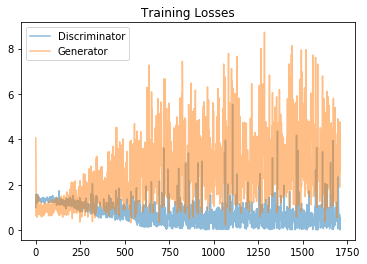

In [20]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator', alpha=0.5)
plt.plot(losses.T[1], label='Generator', alpha=0.5)
plt.title("Training Losses")
plt.legend()

## Generator samples from training

View samples of images from the generator, and answer a question about the strengths and weaknesses of your trained models.

In [21]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(16,4), nrows=2, ncols=8, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu().numpy()
        img = np.transpose(img, (1, 2, 0))
        img = ((img + 1)*255 / (2)).astype(np.uint8)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((32,32,3)))

In [22]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

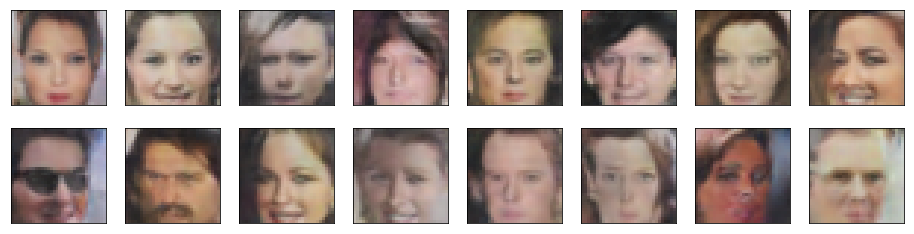

In [23]:
_ = view_samples(-1, samples)

### Question: What do you notice about your generated samples and how might you improve this model?
When you answer this question, consider the following factors:
* The dataset is biased; it is made of "celebrity" faces that are mostly white
* Model size; larger models have the opportunity to learn more features in a data feature space
* Optimization strategy; optimizers and number of epochs affect your final result


**Answer:** <br/>
I tried a couple of sets of parameters:
1. g_conv_dim=d_conv_dim=32, lr=0.0002, no weight decay, 10 epochs of training, batch_size=64.
2. g_conv_dim=d_conv_dim=64, lr=0.001, weight decay=0.01, 20 epochs of training, batch_size=64.
3. g_conv_dim=d_conv_dim=64, lr=0.001, weight decay=0.01, 30 epochs of training and batch_size=32 (this last point was a recommendation from a Udacity reviewer).
4. g_conv_dim=d_conv_dim=64, lr=0.001, weight decay=0.01, 30 epochs of training and batch_size=32 (this last point was a recommendation from a Udacity reviewer) and batch normalization replaced with group normalization (another recommendation).

In the second case I used a much bigger learning rate, but I hoped to get away with it by using weight decay. As the losses started bouncing quite wildly after around 10 epochs I realized that to improve the network I probably should tweak the weight decay more. I also wanted to check one of the points for the project to stand out, so I checked the learning rate scheme in the CycleGAN repo. I found that the authors used a linear decrease of the learning rate, and the learning rate was set to drop to zero after 100 iterations (I haven't found what the authors meant by iteration though - I assume an epoch). In the end I didn't find an easy way to use this scheme with the Adam optimizer, so I stayed with weight decay.

The first network produced images all of which looked like faces, but most of them were pretty creepy. The second network, the results of which are shown above, produced much nicer pictures. Most of them are quite realistic.

To improve the results even further I'd tune the weight decay and the starting learning rate. Also checking convolution dimension of 128 would be a good idea.

Concerning the subquestions:
- At most three faces out of 20 in the sample generated by the network could maybe be defended as depictions of black people. Not a single one is Asian. Obviously, this reflects the dataset used for training. I skimmed through this dataset before starting this project and I realized this to be the case right away. But this behavior is expected, like with for instance the style transfer - if you give the network Van Gogh as a style base, you'll get Van Gogh-like pictures. When you train a network to generate white faces, it generates white faces. This shows the importance of carefully choosing a dataset for a given goal.
- Definitely, going from the convolutional dimension of 32 to 64 made the pictures much more realistic. Now you can clearly distinguish eyes, eyebrows or glasses. With dimension 32 some eyes looked like black holes and glasses were like distortions on the face.
- I haven't tried other optimizers, but the number of epochs definitely has a huge impact on the results. With these complex networks (with convolutional base dimension 64) the results from epoch 10 are pretty bad. They resemble faces, but they're extremely awkward and with some artifacts (like large areas of single color). After 15 epochs the results are already pretty good, but still with rare significant failures. By epoch 20 the results are really decent. Interestingly, results from epoch 20 are better than from epoch 15 even though the loss became quite unstable after epoch 10.

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "problem_unittests.py" files in your submission.